# **Importação das bibliotecas**

In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")


plt.style.use('ggplot')
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)



# **Carregamento e pré-processamento dos dados**

In [2]:
df = pd.read_csv('/kaggle/input/impact-of-social-media-on-suicide-rates/social-media-impact-on-suicide-rates.csv')
file_path = '/kaggle/input/impact-of-social-media-on-suicide-rates/social-media-impact-on-suicide-rates.csv'
df = pd.read_csv(file_path)
df.head()


,year,sex,Suicide Rate % change since 2010,Twitter user count % change since 2010,Facebook user count % change since 2010
0,2010,BTSX,100.000000,100.000000,100.000000
1,2010,FMLE,100.000000,100.000000,100.000000
2,2010,MLE,100.000000,100.000000,100.000000
3,2011,BTSX,98.681894,216.666667,138.980263
4,2011,FMLE,98.183773,216.666667,138.980263


In [3]:
df.info()
print(df.shape)
df.size
print(df.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 5 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   year                                     30 non-null     int64  
 1   sex                                      30 non-null     object 
 2   Suicide Rate % change since 2010         30 non-null     float64
 3   Twitter user count % change since 2010   30 non-null     float64
 4   Facebook user count % change since 2010  30 non-null     float64
dtypes: float64(3), int64(1), object(1)
memory usage: 1.3+ KB
(30, 5)
year                                       0
sex                                        0
Suicide Rate % change since 2010           0
Twitter user count % change since 2010     0
Facebook user count % change since 2010    0
dtype: int64


In [4]:
df.describe


<bound method NDFrame.describe of     year   sex  Suicide Rate % change since 2010  \
0   2010  BTSX                        100.000000   
1   2010  FMLE                        100.000000   
2   2010   MLE                        100.000000   
3   2011  BTSX                         98.681894   
4   2011  FMLE                         98.183773   
5   2011   MLE                         98.795530   
6   2012  BTSX                         98.595123   
7   2012  FMLE                         97.653750   
8   2012   MLE                         98.857511   
9   2013  BTSX                         97.119135   
10  2013  FMLE                         95.672700   
11  2013   MLE                         97.517070   
12  2014  BTSX                         95.848213   
13  2014  FMLE                         94.606231   
14  2014   MLE                         96.154775   
15  2015  BTSX                         94.177492   
16  2015  FMLE                         93.219199   
17  2015   MLE                

In [5]:
categorical_cols = df.select_dtypes(include=['object']).columns
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

print("Colunas categóricas:", categorical_cols)
print("Colunas numéricas:", numerical_cols)

Colunas categóricas: Index(['sex'], dtype='object')
Colunas numéricas: Index(['year', 'Suicide Rate % change since 2010',
       'Twitter user count % change since 2010',
       'Facebook user count % change since 2010'],
      dtype='object')


# **Visualização**

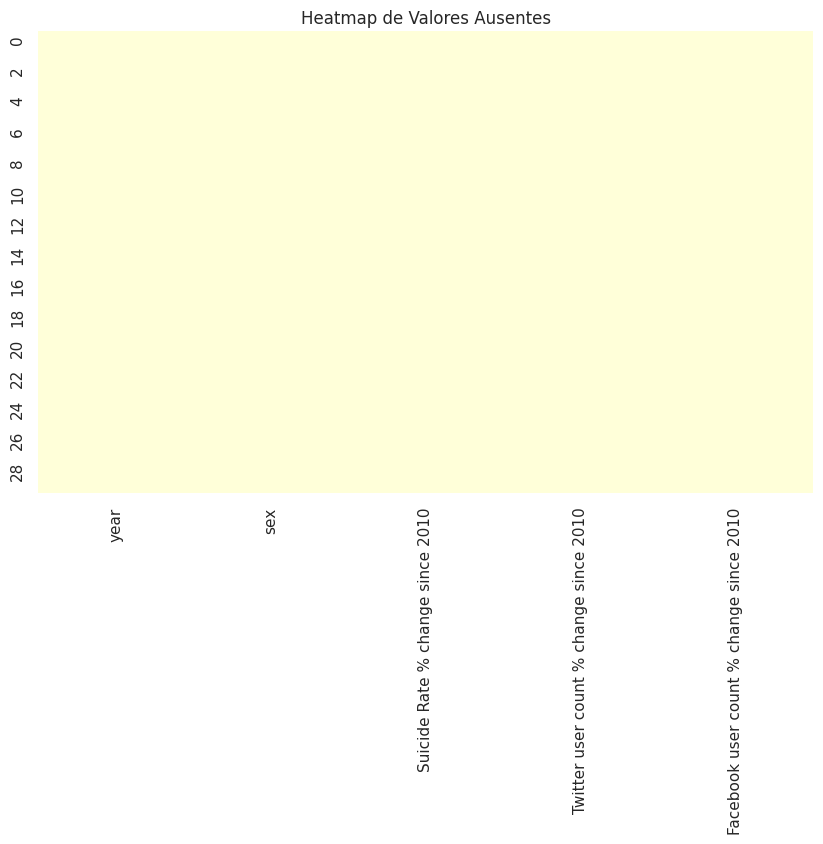

In [6]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='YlGnBu')
plt.title('Heatmap de Valores Ausentes')
plt.show()


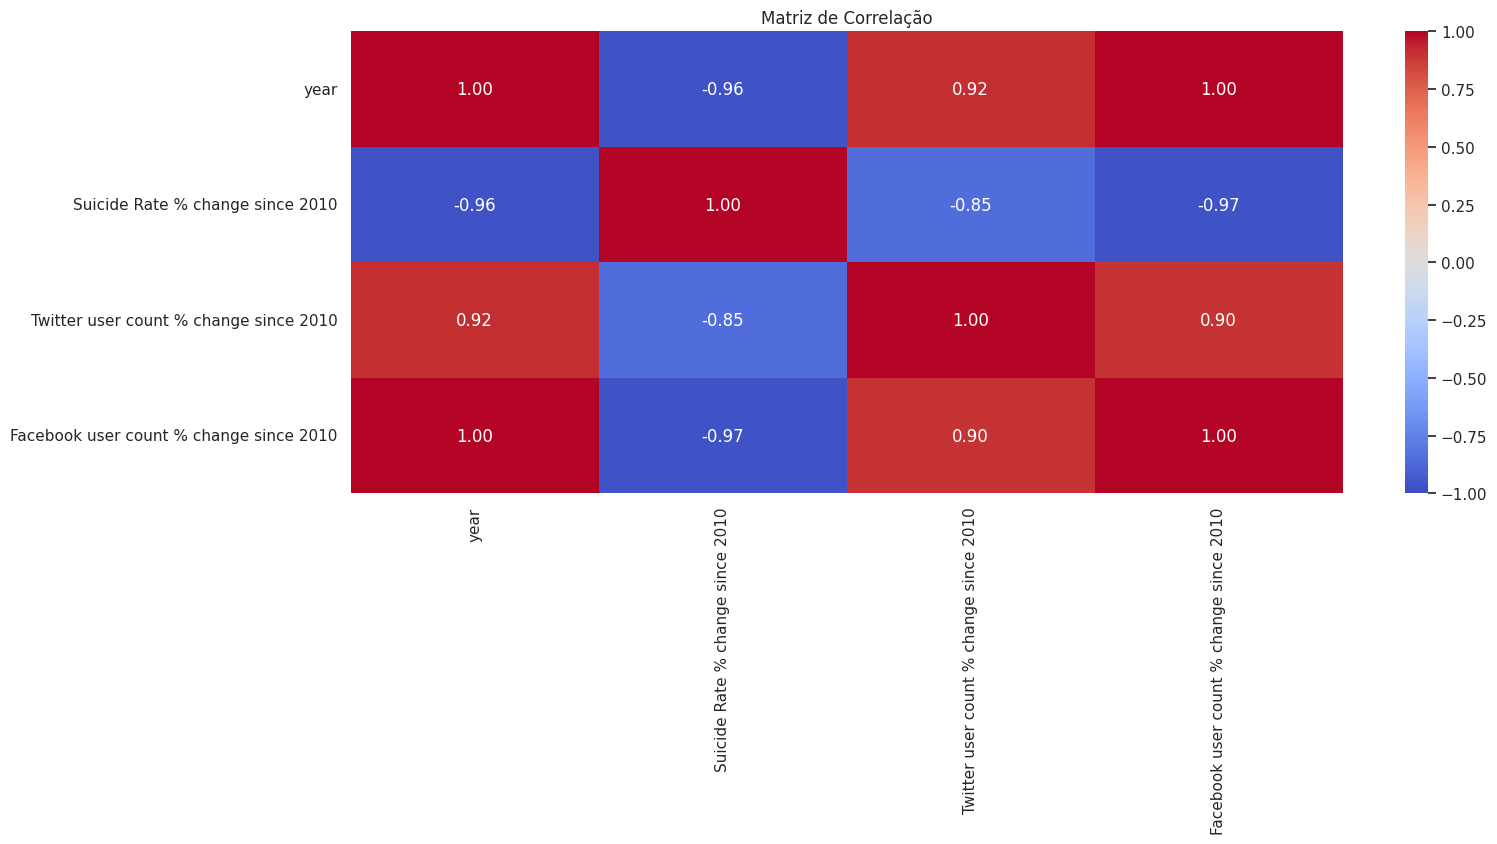

In [7]:
correlation_matrix = df[numerical_cols].corr()
plt.figure(figsize=(16, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1)
plt.title('Matriz de Correlação')
plt.show()


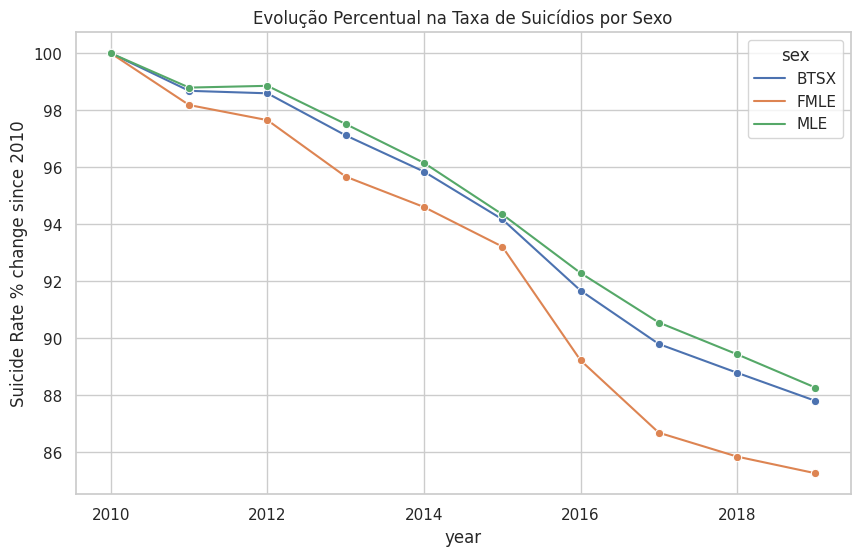

In [8]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x='year', y='Suicide Rate % change since 2010', hue='sex', marker='o')
plt.title('Evolução Percentual na Taxa de Suicídios por Sexo')
plt.show()

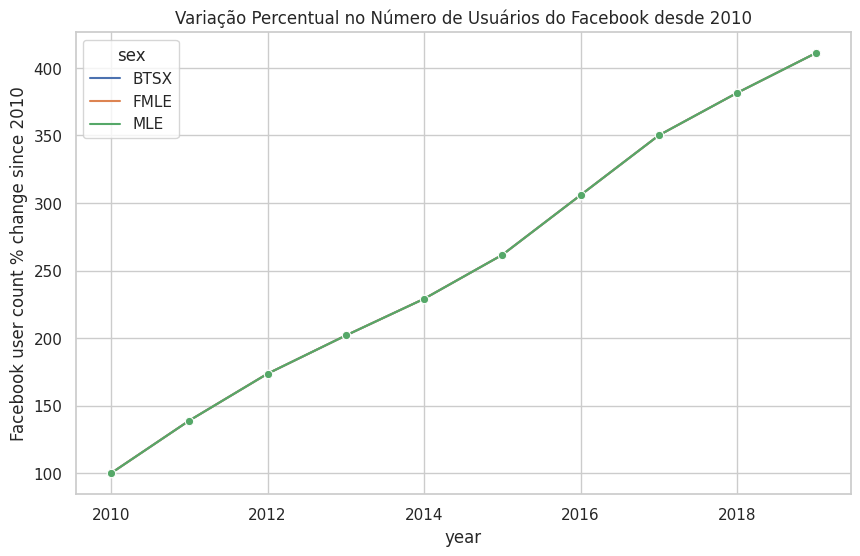

In [9]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x='year', y='Facebook user count % change since 2010', hue='sex', marker='o')
plt.title('Variação Percentual no Número de Usuários do Facebook desde 2010')
plt.show()

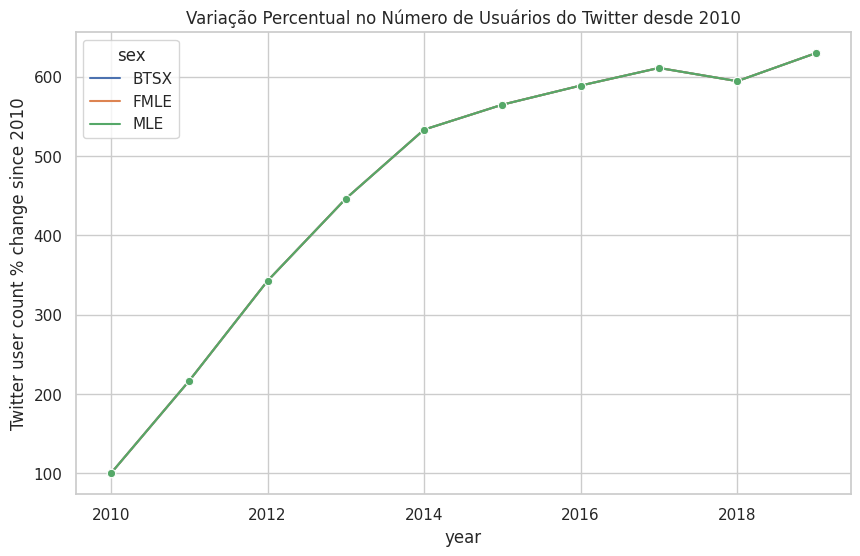

In [10]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x='year', y='Twitter user count % change since 2010', hue='sex', marker='o')
plt.title('Variação Percentual no Número de Usuários do Twitter desde 2010')
plt.show()

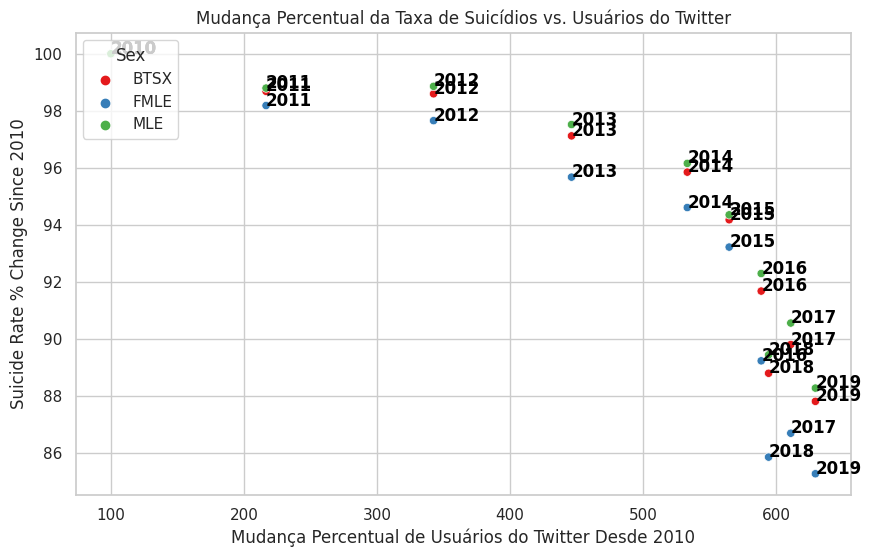

In [11]:
plt.figure(figsize=(10, 6))

sns.scatterplot(data=df, x='Twitter user count % change since 2010',
                y='Suicide Rate % change since 2010', hue='sex', palette='Set1')

for line in range(0, df.shape[0]):
    plt.text(df['Twitter user count % change since 2010'][line], 
             df['Suicide Rate % change since 2010'][line], 
             df['year'][line], 
             horizontalalignment='left', 
             size='medium', 
             color='black', 
             weight='semibold')

plt.title('Mudança Percentual da Taxa de Suicídios vs. Usuários do Twitter')
plt.xlabel('Mudança Percentual de Usuários do Twitter Desde 2010')
plt.ylabel('Suicide Rate % Change Since 2010')
plt.legend(title='Sex', loc='upper left')
plt.show()





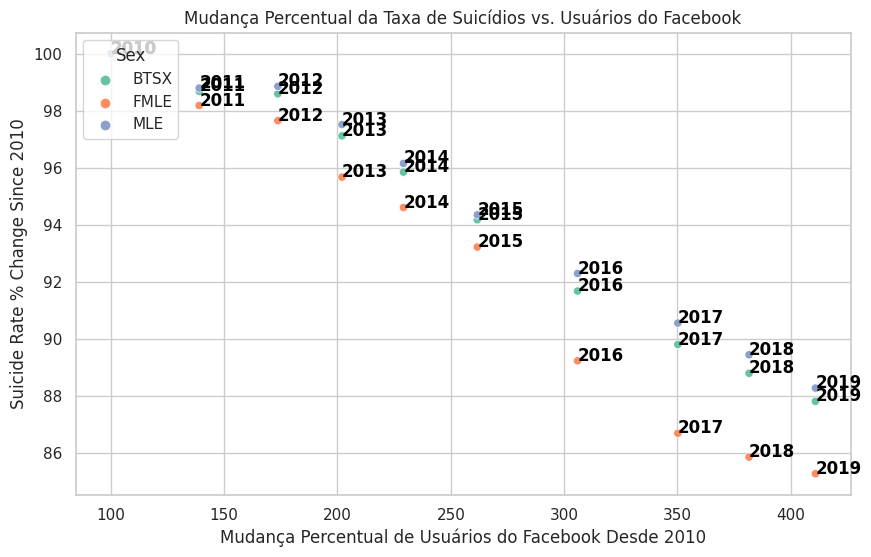

In [12]:
plt.figure(figsize=(10, 6))

sns.scatterplot(data=df, x='Facebook user count % change since 2010',
                y='Suicide Rate % change since 2010', hue='sex', palette='Set2')

for line in range(0, df.shape[0]):
    plt.text(df['Facebook user count % change since 2010'][line], 
             df['Suicide Rate % change since 2010'][line], 
             df['year'][line], 
             horizontalalignment='left', 
             size='medium', 
             color='black', 
             weight='semibold')

plt.title('Mudança Percentual da Taxa de Suicídios vs. Usuários do Facebook')
plt.xlabel('Mudança Percentual de Usuários do Facebook Desde 2010')
plt.ylabel('Suicide Rate % Change Since 2010')
plt.legend(title='Sex', loc='upper left')
plt.show()

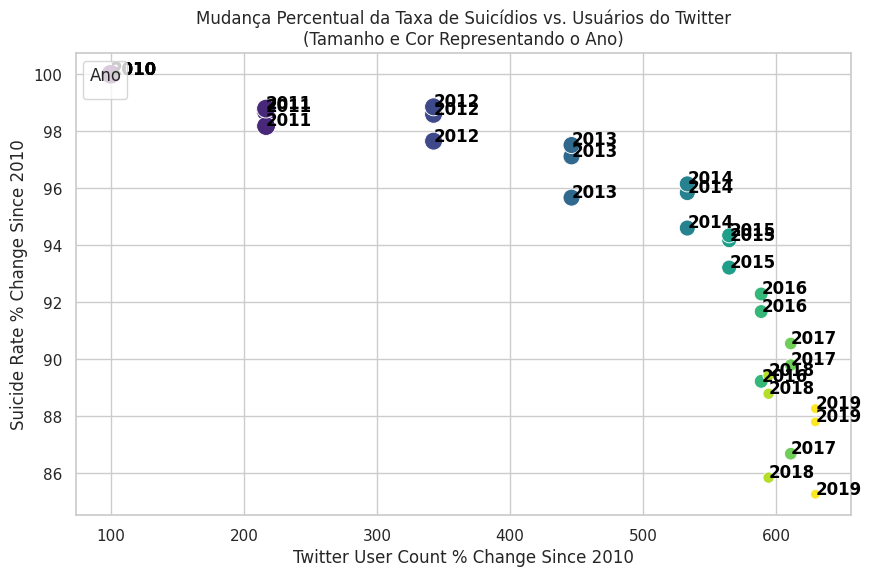

In [13]:
plt.figure(figsize=(10, 6))

sns.scatterplot(data=df, x='Twitter user count % change since 2010',
                y='Suicide Rate % change since 2010',
                hue='year', size='year', 
                palette='viridis', sizes=(200, 50), legend=None)

# Adicionando rótulos aos pontos (Ano)
for line in range(0, df.shape[0]):
    plt.text(df['Twitter user count % change since 2010'][line], 
             df['Suicide Rate % change since 2010'][line], 
             df['year'][line], 
             horizontalalignment='left', 
             size='medium', 
             color='black', 
             weight='semibold')

plt.title('Mudança Percentual da Taxa de Suicídios vs. Usuários do Twitter\n(Tamanho e Cor Representando o Ano)')
plt.xlabel('Twitter User Count % Change Since 2010')
plt.ylabel('Suicide Rate % Change Since 2010')
plt.legend(title='Ano', loc='upper left')
plt.show()


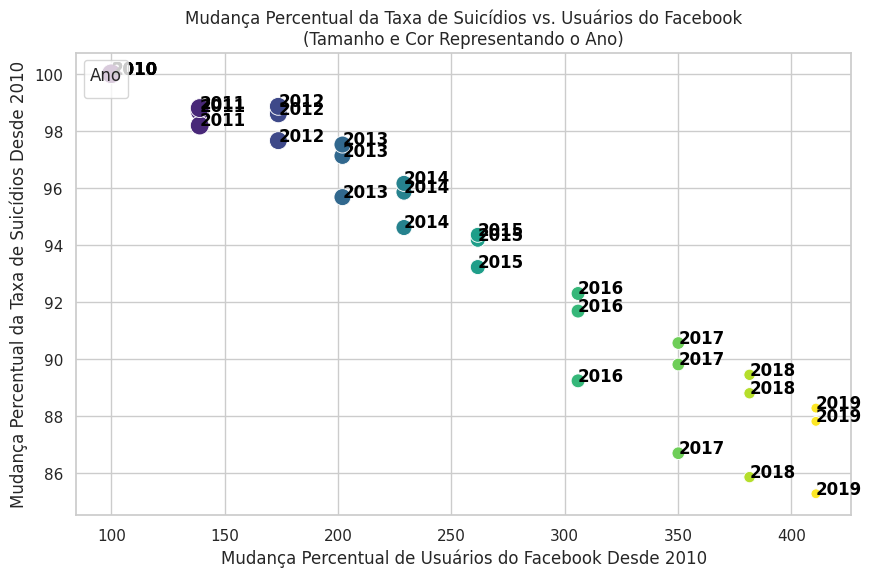

In [14]:
plt.figure(figsize=(10, 6))

sns.scatterplot(data=df, x='Facebook user count % change since 2010',
                y='Suicide Rate % change since 2010',
                hue='year', size='year', 
                palette='viridis', sizes=(200, 50), legend=None)

for line in range(0, df.shape[0]):
    plt.text(df['Facebook user count % change since 2010'][line], 
             df['Suicide Rate % change since 2010'][line], 
             df['year'][line], 
             horizontalalignment='left', 
             size='medium', 
             color='black', 
             weight='semibold')

plt.title('Mudança Percentual da Taxa de Suicídios vs. Usuários do Facebook\n(Tamanho e Cor Representando o Ano)')
plt.xlabel('Mudança Percentual de Usuários do Facebook Desde 2010')
plt.ylabel('Mudança Percentual da Taxa de Suicídios Desde 2010')
plt.legend(title='Ano', loc='upper left')
plt.show()

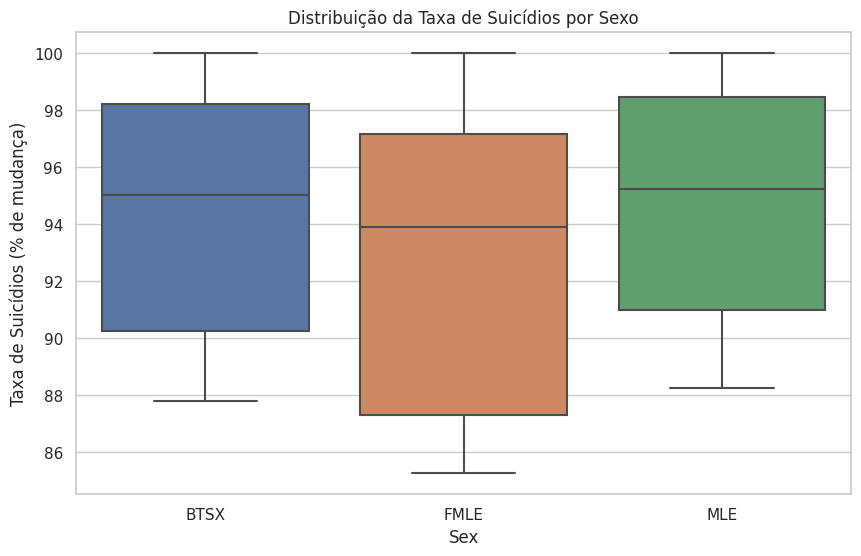

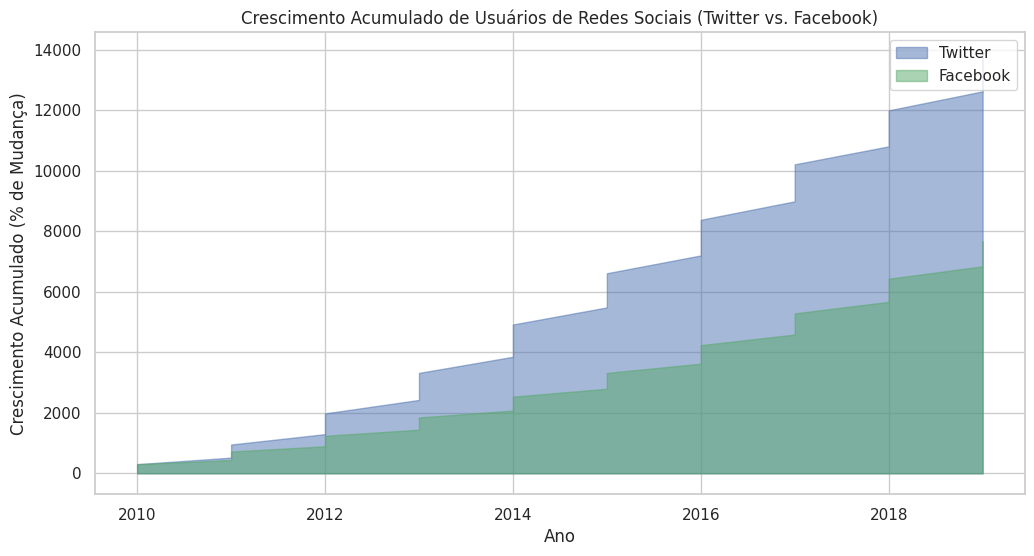

In [15]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='sex', y='Suicide Rate % change since 2010', data=df)
plt.title('Distribuição da Taxa de Suicídios por Sexo')
plt.xlabel('Sex')
plt.ylabel('Taxa de Suicídios (% de mudança)')
plt.show()

df['Cumulative Twitter Change'] = df['Twitter user count % change since 2010'].cumsum()
df['Cumulative Facebook Change'] = df['Facebook user count % change since 2010'].cumsum()

plt.figure(figsize=(12, 6))
plt.fill_between(df['year'], df['Cumulative Twitter Change'], color='b', alpha=0.5, label='Twitter')
plt.fill_between(df['year'], df['Cumulative Facebook Change'], color='g', alpha=0.5, label='Facebook')
plt.title('Crescimento Acumulado de Usuários de Redes Sociais (Twitter vs. Facebook)')
plt.xlabel('Ano')
plt.ylabel('Crescimento Acumulado (% de Mudança)')
plt.legend()
plt.show()


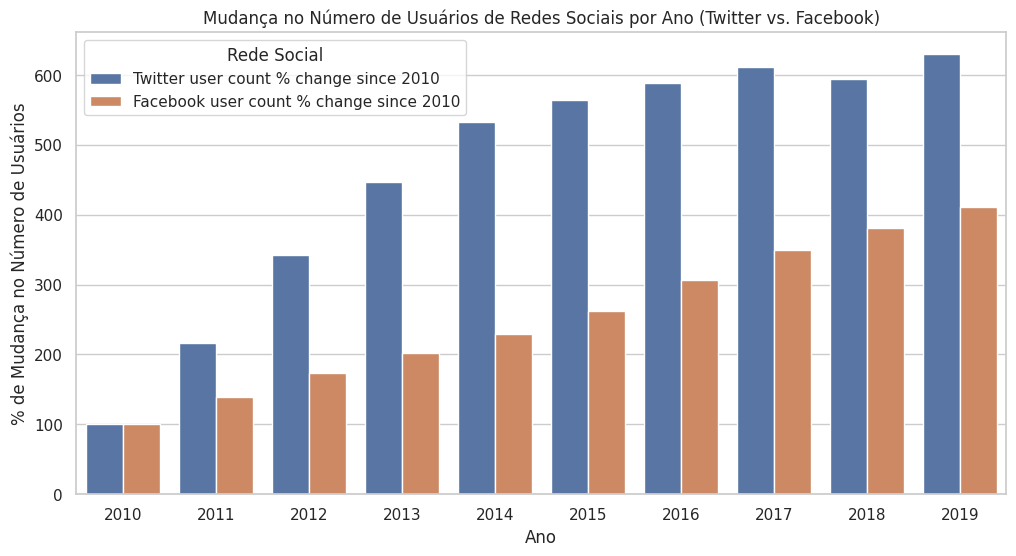

In [16]:
df_melted = df.melt(id_vars=['year'], 
                    value_vars=['Twitter user count % change since 2010', 'Facebook user count % change since 2010'],
                    var_name='Social Media', 
                    value_name='% Change')

plt.figure(figsize=(12, 6))
sns.barplot(x='year', y='% Change', hue='Social Media', data=df_melted)
plt.title('Mudança no Número de Usuários de Redes Sociais por Ano (Twitter vs. Facebook)')
plt.xlabel('Ano')
plt.ylabel('% de Mudança no Número de Usuários')
plt.legend(title='Rede Social', loc='upper left')
plt.show()

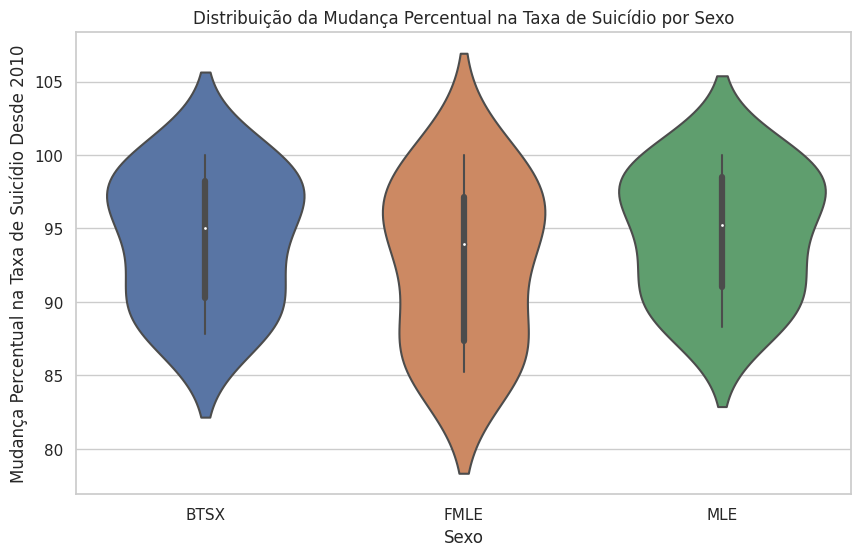

In [17]:
plt.figure(figsize=(10, 6))
sns.violinplot(x='sex', y='Suicide Rate % change since 2010', data=df)
plt.title('Distribuição da Mudança Percentual na Taxa de Suicídio por Sexo')
plt.xlabel('Sexo')
plt.ylabel('Mudança Percentual na Taxa de Suicídio Desde 2010')
plt.show()

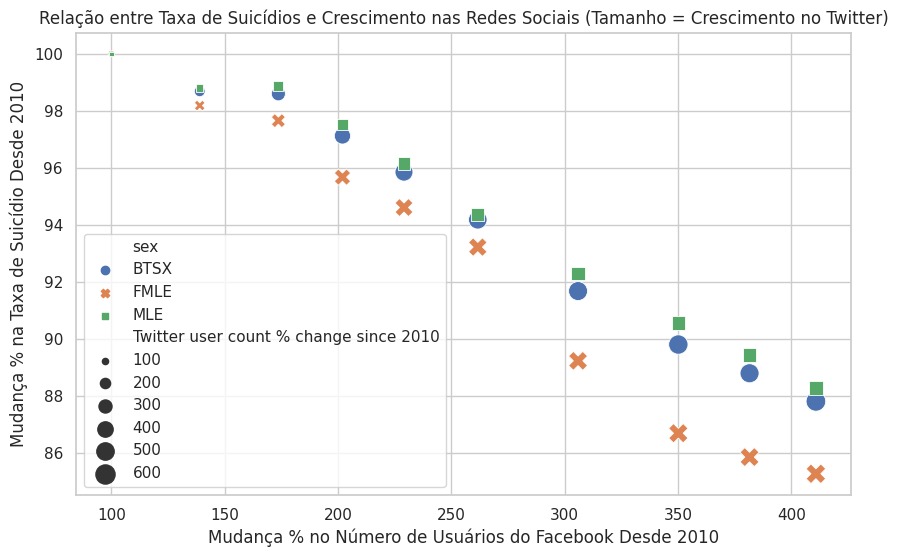

In [18]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Facebook user count % change since 2010', 
                y='Suicide Rate % change since 2010', 
                size='Twitter user count % change since 2010',
                sizes=(20, 200), data=df, hue='sex', style='sex')
plt.title('Relação entre Taxa de Suicídios e Crescimento nas Redes Sociais (Tamanho = Crescimento no Twitter)')
plt.xlabel('Mudança % no Número de Usuários do Facebook Desde 2010')
plt.ylabel('Mudança % na Taxa de Suicídio Desde 2010')
plt.legend()
plt.show()

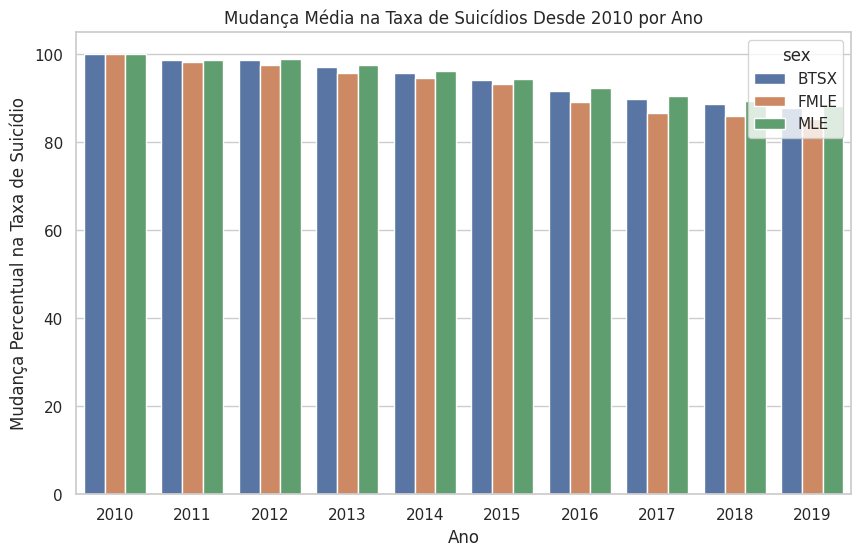

In [19]:
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='year', y='Suicide Rate % change since 2010', hue='sex', ci=None)
plt.title('Mudança Média na Taxa de Suicídios Desde 2010 por Ano')
plt.xlabel('Ano')
plt.ylabel('Mudança Percentual na Taxa de Suicídio')
plt.show()

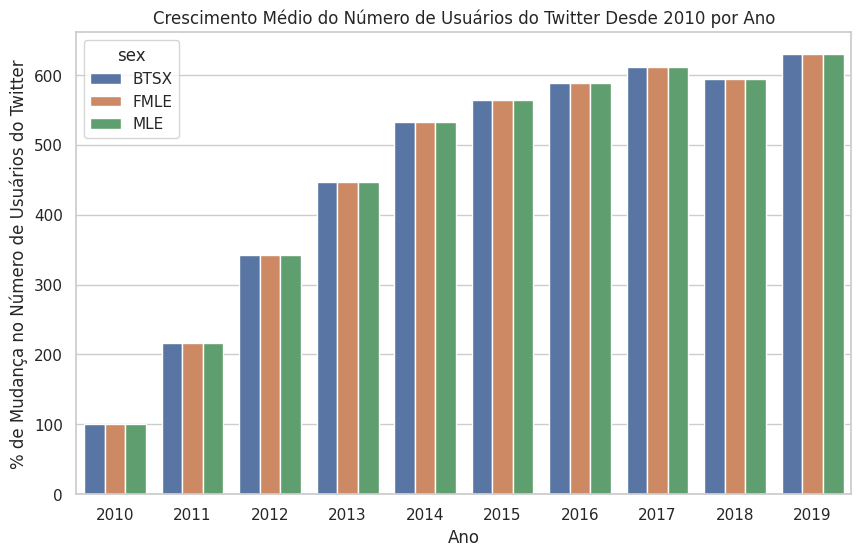

In [20]:
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='year', y='Twitter user count % change since 2010', hue='sex', ci=None)
plt.title('Crescimento Médio do Número de Usuários do Twitter Desde 2010 por Ano')
plt.xlabel('Ano')
plt.ylabel('% de Mudança no Número de Usuários do Twitter')
plt.show()

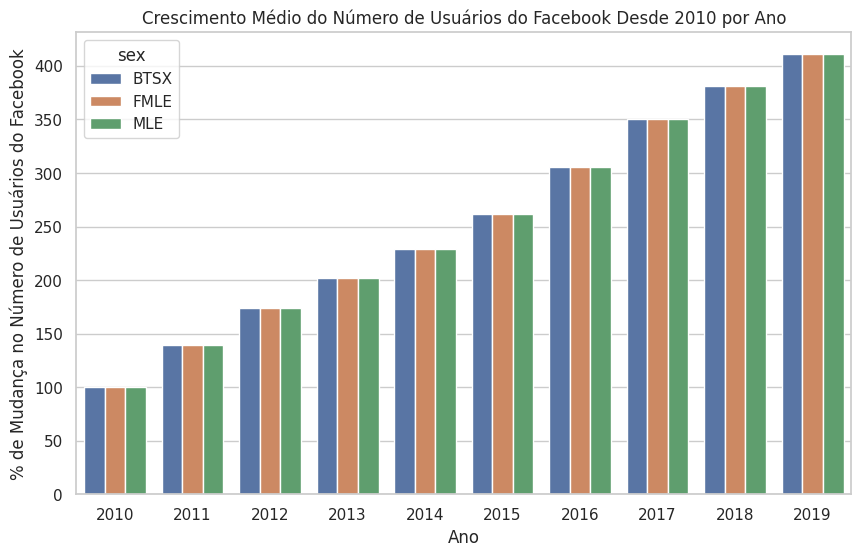

In [21]:
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='year', y='Facebook user count % change since 2010', hue='sex', ci=None)
plt.title('Crescimento Médio do Número de Usuários do Facebook Desde 2010 por Ano')
plt.xlabel('Ano')
plt.ylabel('% de Mudança no Número de Usuários do Facebook')
plt.show()